<a href="https://colab.research.google.com/github/Preetha06/Minor-project-task2/blob/main/Medical_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
#import the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#import the dataset into pandas dataframe
df=pd.read_csv('/content/insurance (2).csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#getting the number of rows and columns
df.shape

(1338, 7)

In [7]:
#getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#Data Analysis
#statistical measues of the dataset
df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [9]:
#checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [11]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

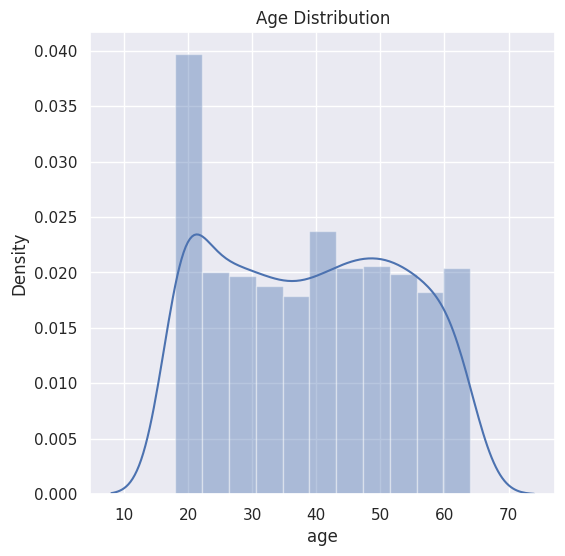

In [13]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

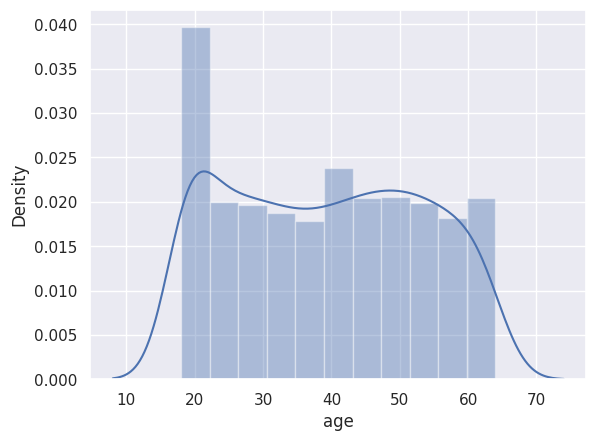

In [14]:
sns.distplot(df['age'])
plt.show()

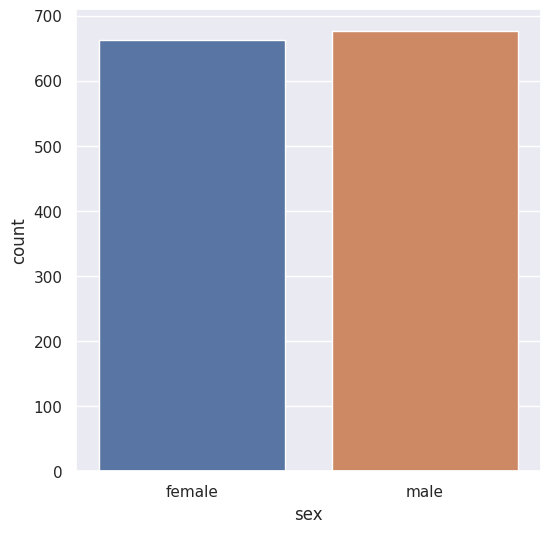

In [15]:
#Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.show()

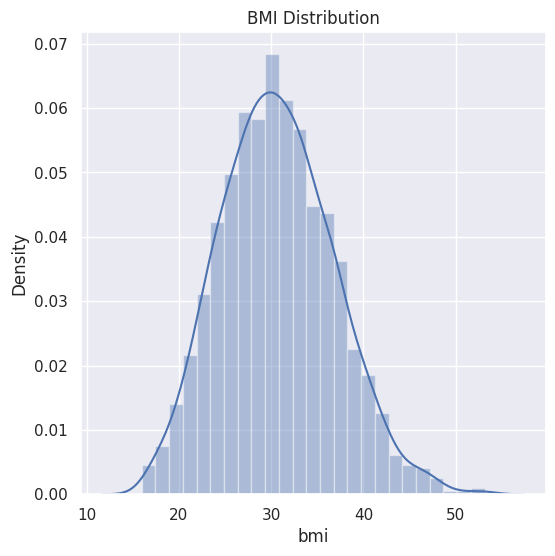

In [17]:
#distribution of bmi value
#Normal Bmi range is 18.5 to 24.9
#By looking at the data we can say that maximum people are overweight

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

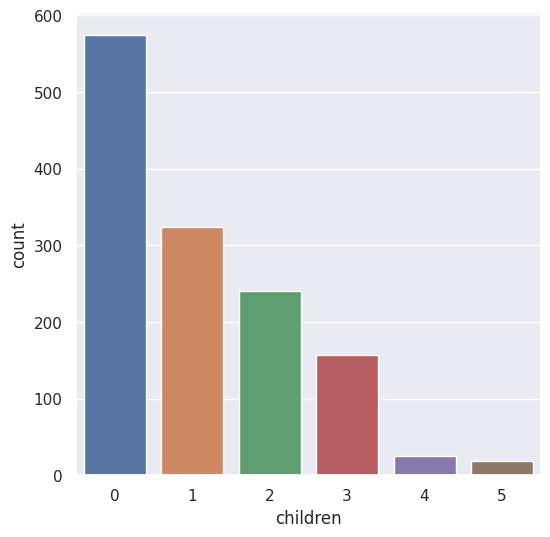

In [18]:
#Children column Distribution
plt.figure(figsize=(6,6))
sns.countplot(x=df['children'],data=df)
plt.show()

In [19]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

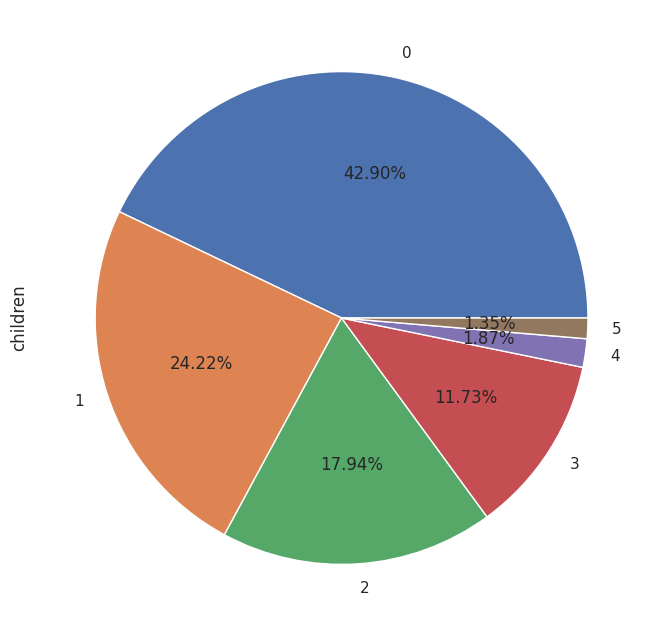

In [20]:
 plt.figure(figsize=(8,8))
df['children'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

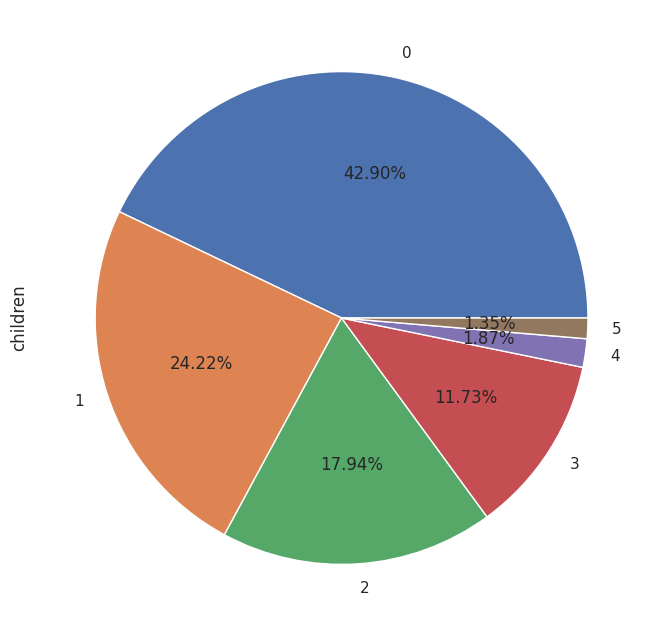

In [21]:
plt.figure(figsize=(8,8))
df['children'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [22]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


<Axes: xlabel='smoker', ylabel='count'>

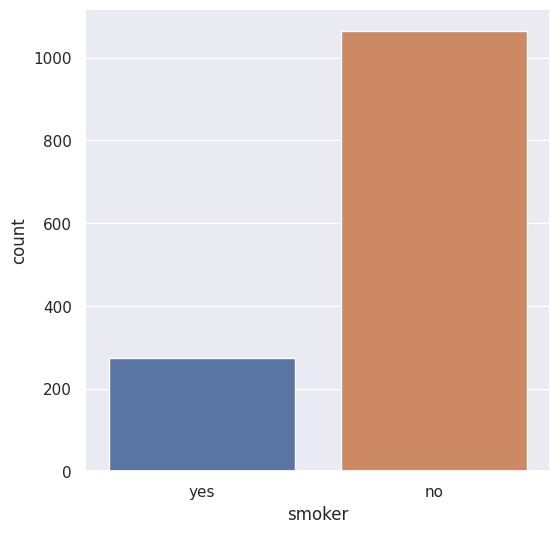

In [23]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)

In [24]:
df['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

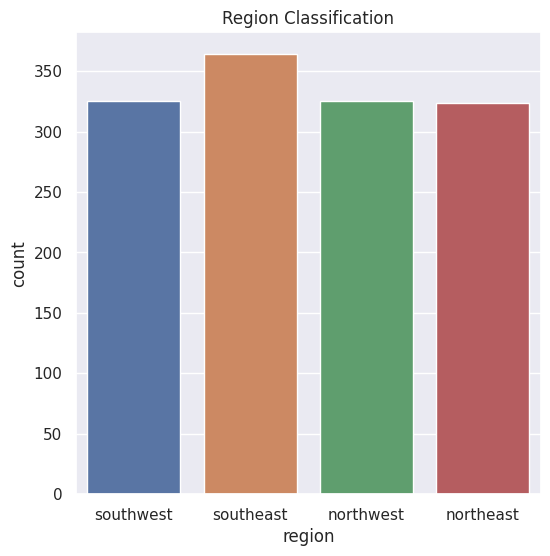

In [25]:
#Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('Region Classification')
plt.show()

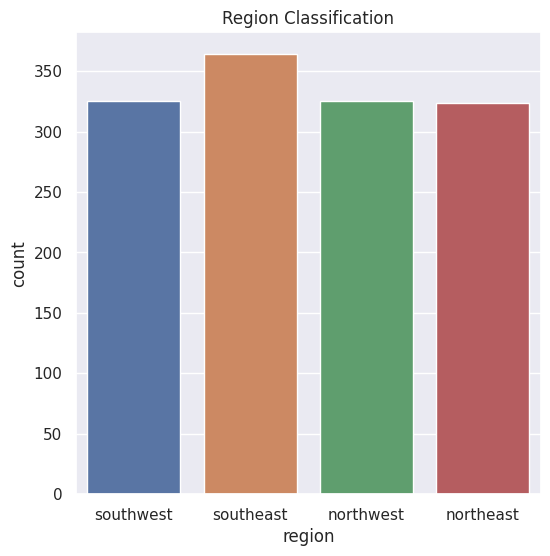

In [26]:
#Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('Region Classification')
plt.show()

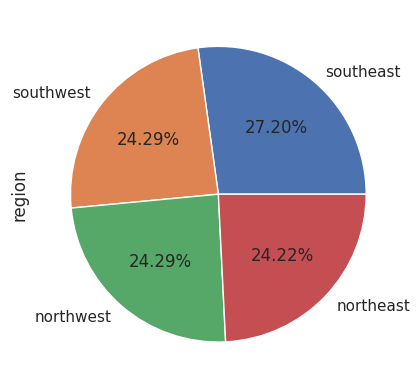

In [27]:
df['region'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

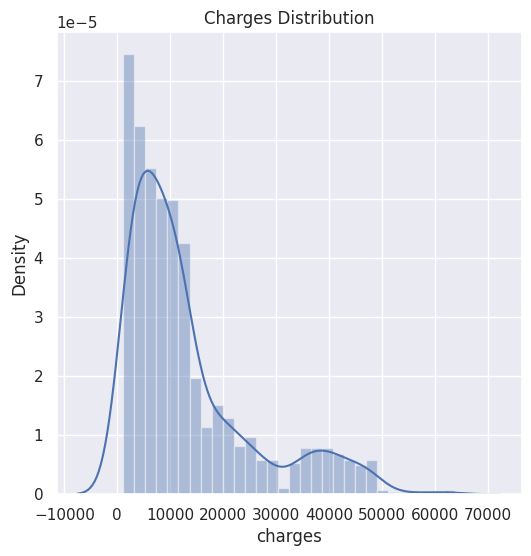

In [28]:
#distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [29]:
#Data pre-processing
#Encoding the categorical features
#Encoding Sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)
#encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df
#encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [30]:
#Splitting the features and target
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [31]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [32]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [35]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
#LinearRegression()
#Model Evaluation
#prediction on training data
training_data_prediction=regressor.predict(x_train)
#R squared value
r2_score=metrics.r2_score(y_train,training_data_prediction)
print('R squared value for the model is',r2_score)

R squared value for the model is 0.751505643411174


In [36]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.9,0,0,1,16884.924


In [37]:
#Building a predictive system
input_data=(31,1,25.74,0,1,0)
#changing the input data to a numpy array
input_data_asarray=np.asarray(input_data)
#reshape the array
input_data_reshaped=input_data_asarray.reshape(1,-1)

In [38]:
prediction=regressor.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is Rs',prediction[0])

[3760.0805765]
The insurance cost is Rs 3760.080576496057
